# Multi-Layer Perceptron

## Import

In [505]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler

## Code

In [506]:
# Récupération des données en spécifiant le séparateur
TRAIN_FILE_PATH = "./data/ECG200_TRAIN.tsv"
TEST_FILE_PATH = "./data/ECG200_TEST.tsv"

train_df = pd.read_csv(TRAIN_FILE_PATH, sep='\t', header=None).dropna()
test_df = pd.read_csv(TEST_FILE_PATH, sep='\t', header=None).dropna()

y_train = train_df.iloc[:, 0]
X_train = train_df.iloc[:, 1:]

y_test = test_df.iloc[:, 0]
X_test = test_df.iloc[:, 1:]

# Passage des classes -1/1 à 0/1
y_train = y_train.replace(-1, 0)
y_test = y_test.replace(-1, 0)

# Normalisation des données
scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_normalized = scaler.transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Transformation en tableau NumPy
X_train_array = np.asarray(X_train_normalized)
X_test_array = np.asarray(X_test_normalized)

y_train_array = np.asarray(y_train)
y_test_array = np.asarray(y_test)

Model: "model_72"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_73 (InputLayer)       [(None, 96)]              0         
                                                                 
 dense_199 (Dense)           (None, 32)                3104      
                                                                 
 dropout_32 (Dropout)        (None, 32)                0         
                                                                 
 dense_200 (Dense)           (None, 1)                 33        
                                                                 
Total params: 3,137
Trainable params: 3,137
Non-trainable params: 0
_________________________________________________________________


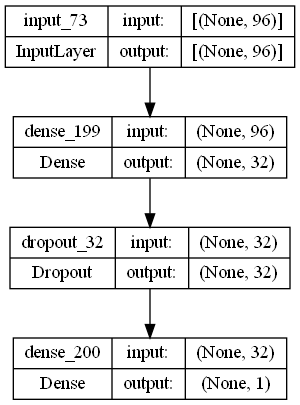

In [507]:
# Construction du MLP
input_shape = X_train_array.shape[1:]
input_layer = tf.keras.layers.Input(input_shape)

hidden_layer_1 = tf.keras.layers.Dense(units=32, activation='relu')(input_layer)
dropout_1 = tf.keras.layers.Dropout(rate=0.2)(hidden_layer_1)

output_layer = tf.keras.layers.Dense(units=1, activation='sigmoid')(dropout_1)

# Création du modèle
model_mlp = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

model_mlp.summary()
tf.keras.utils.plot_model(model_mlp, show_shapes=True)

In [508]:
# Compilation du modèle
learning_rate = 0.001
optimizer_algo = tf.keras.optimizers.Adam(learning_rate=learning_rate)
cost_function = tf.keras.losses.binary_crossentropy

model_mlp.compile(loss=cost_function, optimizer=optimizer_algo, metrics=['accuracy'])

In [509]:
# Entraînement du modèle
nb_epochs = 300
mini_batch_size = 32
percentage_of_train_as_validation = 0.2

model_checkpoint = tf.keras.callbacks.ModelCheckpoint('best-model.h5', monitor='val_loss', mode='min',
                                                      save_best_only=True, verbose=1)

history_mlp = model_mlp.fit(X_train_array, y_train_array,
                            batch_size=mini_batch_size,
                            epochs=nb_epochs,
                            verbose=True,
                            validation_split=percentage_of_train_as_validation,
                            callbacks=[model_checkpoint])

Epoch 1/300
1/3 [=========>....................] - ETA: 0s - loss: 0.5308 - accuracy: 0.7812
Epoch 1: val_loss improved from inf to 0.70963, saving model to best-model.h5
3/3 [==============================] - 0s 61ms/step - loss: 0.5708 - accuracy: 0.7250 - val_loss: 0.7096 - val_accuracy: 0.5500
Epoch 2/300
1/3 [=========>....................] - ETA: 0s - loss: 0.5907 - accuracy: 0.6562
Epoch 2: val_loss improved from 0.70963 to 0.69369, saving model to best-model.h5
3/3 [==============================] - 0s 13ms/step - loss: 0.5304 - accuracy: 0.7250 - val_loss: 0.6937 - val_accuracy: 0.5500
Epoch 3/300
1/3 [=========>....................] - ETA: 0s - loss: 0.5392 - accuracy: 0.7500
Epoch 3: val_loss improved from 0.69369 to 0.67535, saving model to best-model.h5
3/3 [==============================] - 0s 13ms/step - loss: 0.4972 - accuracy: 0.7375 - val_loss: 0.6754 - val_accuracy: 0.5500
Epoch 4/300
1/3 [=========>....................] - ETA: 0s - loss: 0.5934 - accuracy: 0.6562
Ep

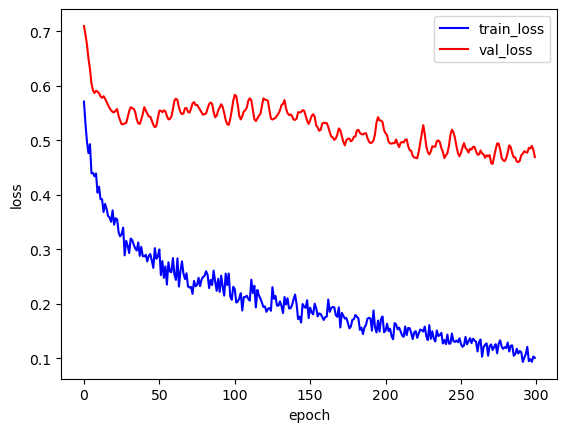

In [510]:
# Affichage des résultats de l'entraînement
history_dict = history_mlp.history
loss_train_epochs = history_dict['loss']
loss_val_epochs = history_dict['val_loss']

plt.figure()
plt.plot(loss_train_epochs, color='blue', label='train_loss')
plt.plot(loss_val_epochs, color='red', label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.savefig('epoch-loss.pdf')
plt.show()
plt.close()

In [511]:
# Test de précision du modèle à l'aide du jeu de test
model = tf.keras.models.load_model('best-model.h5')
loss, acc = model.evaluate(X_test_array, y_test_array)

print("Accuracy MLP:", acc)
print("Loss MLP:", loss)

4/4 [==============================] - 0s 817us/step - loss: 0.4478 - accuracy: 0.7800
Accuracy MLP: 0.7799999713897705
Loss MLP: 0.44782310724258423
